In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def derivative_r(r, f):
    return r * (rabbit_birth_rate - rabbit_hunting_death_rate * f)

def derivative_f(r, f):
    return f * (fox_hunting_birth_rate * r - fox_death_rate)
    

In [23]:
r = 1000  # Начальное количество кроликов
f = 100   # Начальное количество лис
t = 0     # Начальное время
h = 0.01 # Шаг

# Параметры модели
fox_death_rate = 0.5
rabbit_birth_rate = 0.7
fox_hunting_birth_rate = 0.0007
rabbit_hunting_death_rate = 0.0007

R = []
F = []
T = []

In [24]:
while t <= 100:
    R.append(r)
    F.append(f)
    T.append(t)
             
    r_old = r
    f_old = f
    
    k1_r = derivative_r(r_old, f_old)
    k1_f = derivative_f(r_old, f_old)
    
    k2_r = derivative_r(r_old + h * k1_r / 2, f_old + h * k1_f / 2)
    k2_f = derivative_f(r_old + h * k1_r / 2, f_old + h * k1_f / 2)
    
    k3_r = derivative_r(r_old + h * k2_r / 2, f_old + h * k2_f / 2)
    k3_f = derivative_f(r_old + h * k2_r / 2, f_old + h * k2_f / 2)
    
    k4_r = derivative_r(r_old + h * k3_r, f_old + h * k3_f)
    k4_f = derivative_f(r_old + h * k3_r, f_old + h * k3_f)
             
    r += h * (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    f += h * (k1_f + 2 * k2_f + 2 * k3_f + k4_f) / 6
    t += h

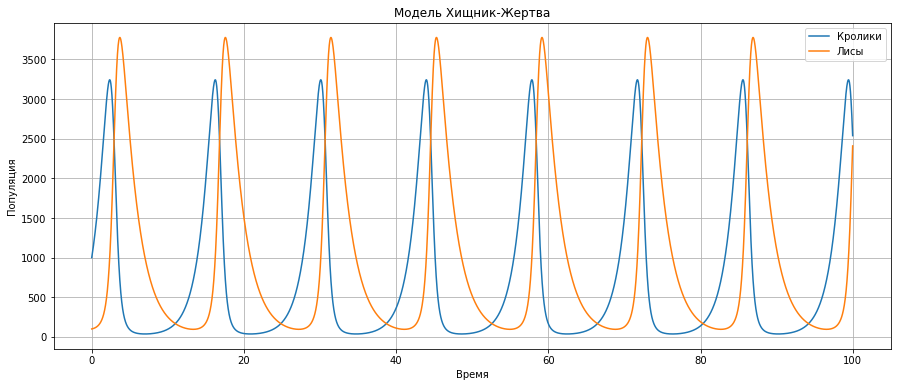

In [25]:
plt.figure(figsize=[15, 6])
plt.plot(T, R, label="Кролики")
plt.plot(T, F, label="Лисы")
plt.grid()
plt.legend()
plt.title("Модель Хищник-Жертва")
plt.xlabel("Время")
plt.ylabel("Популяция")
plt.show()